# Bonus Assignment 01
# Due: Wednesday July 17th, 2024, 3:59 PM
# Late submissions until July 22nd, 3:59 PM
## Instructions:
1. Once the notebook is completed, export to .py file.  Submit both the notebook and the .py file.  To do this, click export at the top of the notebook or ctrl + shift + p at the top of the notebook and type in export.  Export to python file should show up as a search result.  Also:
    - Ensure that your .py file is an exact replica of your .ipynb file.  
    - Ensure your .py and .ipynb files run successfully without any errors.  You should be able to click `Run All` in VS Code and run the notebook without error before converting to a .py file.  When completed, you should be able to run the .py file from the terminal or command prompt.
2. DO NOT submit the data from the assignment and keep your data file and python file in the same directory. Do not use your local directory path to read files (e.g., avoid using paths like C:/your/directory/file.csv).  Just read in the file directly as if though it was in the same directory as your .ipynb file.  DO NOT CHANGE THE NAME OF THE FILE....
3. Whenever we ask to .head(10) the results or print out a value, please use `print()` so for example `print(df.head(10))`. Print only the answers to the questions that have been asked.  Do not print the head of a dataset unless explicitly asked. 
4. Whenever displaying a graph use `plt.show()`
5. For theoretical answers/short answers, use print() (e.g., print("your answer")).
6. Wherever we have code displayed to print out values, use that code as a template to print out your output.  For example, if we give you `print(f'Threshold for best accuracy: {}')` please use code in this style to print out your output.  For some questions, this is only a template as we expect you to print out multiple answers (For example....Fit a linear regression model to each of the 5 features INDIVUDALLY and print out the slope and intercept for each. (Don't forget train/test split) requires you use the template for each feature)
7. Do not include pip install commands in your code. You can assume that all required libraries are already installed.

## Bonus Assignment 01 Part 1: Decision Tree with Commute Data

For part 1 of this assignment we are going to import our commute file from Assignment 02, calculate the splits manually for the first two splits and then compare to the output from the sklearn decision tree.

# Import packages and data below

1. Read in packages and data.  Use your file from Assignment 2.  DO NOT ADD ANY PATH INFORMATION and do not change the name of the file.  This is very important.  Many students have failed their assignments because they failed to do this.

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import data like so, but change the name of the file to match YOUR file name (e.g. 'commute01.csv').
df = pd.read_csv('commute12.csv', index_col=0)
df

,day,sun_pct,commute_method
0,Monday,7,car
1,Tuesday,93,foot
2,Wednesday,63,foot
3,Thursday,99,foot
4,Friday,90,foot
...,...,...,...
1082,Wednesday,100,foot
1083,Thursday,25,car
1084,Friday,94,foot
1085,Monday,6,car


2. Create a scatter plot of your data with sun_pct on the x axis and day of the week on the y axis.  Color by commute_method

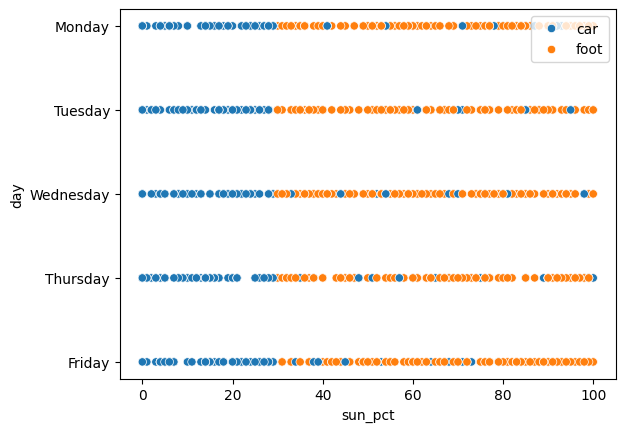

In [23]:
sns.scatterplot(data=df, x=df['sun_pct'], y=df['day'], hue=df['commute_method'])
plt.legend(loc='upper right')
plt.show()

3. Print out the proportion of rows grouped by commute_method column

In [24]:
print(f"The proportion of rows are: {df['commute_method'].value_counts()/df.shape[0]}")

The proportion of rows are: commute_method
foot    0.609936
car     0.390064
Name: count, dtype: float64


4. Is your data set balanced?

In [25]:
print("""No, it's unbalanced""")

No, it's unbalanced


5.  Use the OneHotEncoder from sklearn to encode the day variable.  You will create a new data frame with a column for each day of the week present in your data set with the index equal to the index of the original dataframe.  Print out the head of your new data set. Add your newly encoded dataframe back into your original data frame.  The join function should work since your new day of the week encoding dataframe shares an index with your original dataframe.

In [34]:
encoder = OneHotEncoder()
day_of_week  = encoder.fit_transform(df[['day']]).toarray()
encodeddf = pd.DataFrame(day_of_week, columns=encoder.categories_[0].tolist(), index=df.index) # type: ignore
print(encodeddf.join(df))

      Friday  Monday  Thursday  Tuesday  Wednesday        day  sun_pct  \
0        0.0     1.0       0.0      0.0        0.0     Monday        7   
1        0.0     0.0       0.0      1.0        0.0    Tuesday       93   
2        0.0     0.0       0.0      0.0        1.0  Wednesday       63   
3        0.0     0.0       1.0      0.0        0.0   Thursday       99   
4        1.0     0.0       0.0      0.0        0.0     Friday       90   
...      ...     ...       ...      ...        ...        ...      ...   
1082     0.0     0.0       0.0      0.0        1.0  Wednesday      100   
1083     0.0     0.0       1.0      0.0        0.0   Thursday       25   
1084     1.0     0.0       0.0      0.0        0.0     Friday       94   
1085     0.0     1.0       0.0      0.0        0.0     Monday        6   
1086     0.0     0.0       0.0      1.0        0.0    Tuesday       89   

     commute_method  
0               car  
1              foot  
2              foot  
3              foot  
4

6. Fit a decision tree on the entire data set *with max_depth=2*.  Your X should only include the `sun_pct` and the one hot encoded day of the week columns (Monday, Tuesday, Wednesday, Thursday, etc.), but not the single `day` column. Use max_depth=2, when you intialize your data.  Finally, plot the tree with `tree.plot_tree`.  Follow the example from class.

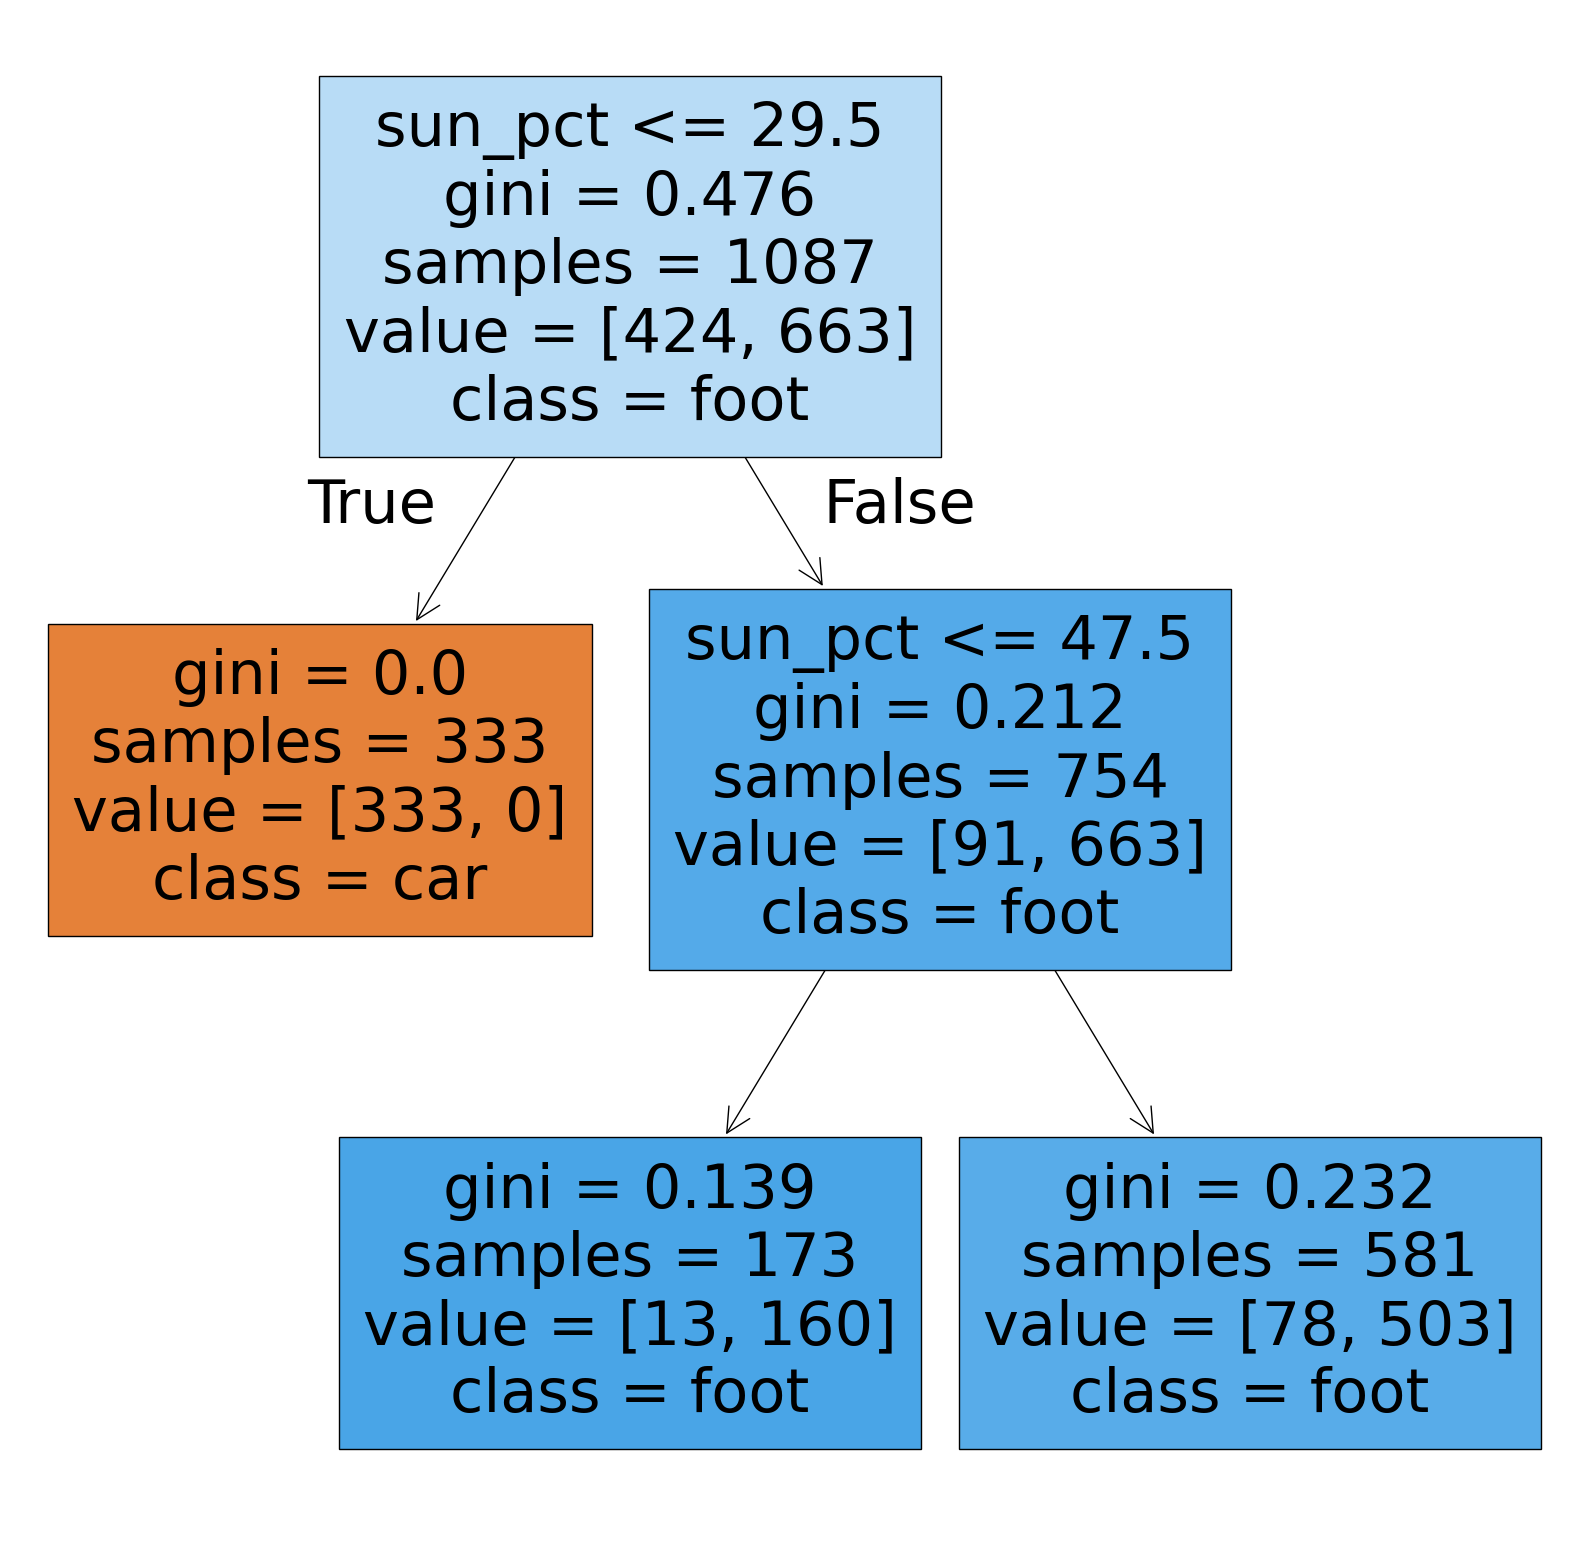

In [40]:
X = df.drop(columns=['day','commute_method'])
y = df['commute_method']

model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)

plt.figure(figsize=(20,20))

_= tree.plot_tree(model,
                  feature_names=X.columns,
                  class_names=model.classes_,
                  filled=True)

plt.show()

7. Calculate the Gini impurity for the `commute_method` column in your data set.  Do this in one line of code *without using any libraries other than pandas*.  Remember that your Gini impurity is calculated as $1-\sum_{k=1}^{n}p_k^2$ where $p_k$ is the proportion of observations in each class.  For our tree it should be $1-(p_{car}^2+p_{foot}^2)$.  *This number should be equal to the first gini value in your displayed tree above.*

In [65]:
print(1 - sum((count/df.shape[0])**2 for count in df['commute_method'].value_counts()[['car','foot']]))

0.4758283265725489


8. Place this one line of code in a function called `calculate_gini`.  It should accept a single argument, a data frame, and return the gini impurity for the `commute_method` column. Call this function on your data frame and print out the result.  It should return the same value as in question 7 and as in the first node of your tree above.

In [66]:
def calculate_gini(df):
    gini = 1 - sum((count/df.shape[0])**2 for count in df['commute_method'].value_counts()[['car','foot']]) # Return the gini impurity
    return gini
# Call the function on your dataframe.  The result should match question 7 and the value of the Gini impurity in the your tree from 6 above
print(calculate_gini(df))

0.4758283265725489


# Training a decision tree:

The way that a decision tree determines the way to split at each node is to iterate over different values of the features in the data set and calculate the loss at each different value of each different feature.  In our case we would iterate over different values of `sun_pct` and each of the one-hot encoded day features, split the data set by those values into left and right subsets and calculate the loss (since the day features are just 0 or 1, we don't iterate, we just use 0.5).

The total loss is calculated as $loss = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$ where $G_{left/right}$ measures the Gini impurity of the left/right subset, $m_{left/right}$ measures the number instances/rows in the left/right subset and $m$ measures the total number of instances

9 Create a function called `calculate_loss`.  This function should take in three values

1. df: a data frame with a `'commute_method'` column.
2. column_name: the name of the column you want to split the data frame by
3. value: the value you want to split df[column_name] by.

You only need to replace the values with ?

In [ ]:
def calculate_loss(df:pd.DataFrame, column_name:str, value:float):

    # Split your df into left and right subsets.
    # The left subset contains all rows in df where the values in df[column_name] are less than or equal to the value argument
    # Use the .copy() method on your filtered result to be safe before you assign it to the variable left_subset
    left_subset = ?
    # The right subset contains all rows in df where the values in df[column_name] are strictly greater than the value argument
    # Use the .copy() method on your filtered result to be safe before you assign it to the variable righ_subset
    right_subset = ?

    # Calculate your left gini and your right gini
    left_gini = calculate_gini(left_subset)
    right_gini = calculate_gini(right_subset)

    # Calculate the total number of rows in your data set and the
    # number of rows in your left and right subset.
    m = ?
    left_m = ?
    right_m = ?

    # Calculate the loss and return
    loss = left_gini*left_m/m + right_gini*right_m/m

    return loss

10. Call the function on your dataframe with column_name='sun_pct' and value=50.5 and print out the result.  This should produce a single value.

In [ ]:
print(?)

11.  Now we are going to calculate the loss over a range of values.  

The code below creates a list of tuples where the first element in each tuple is 'sun_pct' and the second element in your tuple is from a numpy array that starts at 0, stops at 100.5 and has a step of 0.5.  We then extend that list to include the days of the week, but only with 0.5 as the second item, since our one-hot encoded columns are just 0 or 1.  There is nothing you have to do for this question

In [67]:
combos_to_test = [('sun_pct', i)
                  for i in np.arange(start=0, stop=100.5, step=0.5)]
combos_to_test.extend([(d, 0.5) for d in df['day'].unique()])
combos_to_test

[('sun_pct', np.float64(0.0)),
 ('sun_pct', np.float64(0.5)),
 ('sun_pct', np.float64(1.0)),
 ('sun_pct', np.float64(1.5)),
 ('sun_pct', np.float64(2.0)),
 ('sun_pct', np.float64(2.5)),
 ('sun_pct', np.float64(3.0)),
 ('sun_pct', np.float64(3.5)),
 ('sun_pct', np.float64(4.0)),
 ('sun_pct', np.float64(4.5)),
 ('sun_pct', np.float64(5.0)),
 ('sun_pct', np.float64(5.5)),
 ('sun_pct', np.float64(6.0)),
 ('sun_pct', np.float64(6.5)),
 ('sun_pct', np.float64(7.0)),
 ('sun_pct', np.float64(7.5)),
 ('sun_pct', np.float64(8.0)),
 ('sun_pct', np.float64(8.5)),
 ('sun_pct', np.float64(9.0)),
 ('sun_pct', np.float64(9.5)),
 ('sun_pct', np.float64(10.0)),
 ('sun_pct', np.float64(10.5)),
 ('sun_pct', np.float64(11.0)),
 ('sun_pct', np.float64(11.5)),
 ('sun_pct', np.float64(12.0)),
 ('sun_pct', np.float64(12.5)),
 ('sun_pct', np.float64(13.0)),
 ('sun_pct', np.float64(13.5)),
 ('sun_pct', np.float64(14.0)),
 ('sun_pct', np.float64(14.5)),
 ('sun_pct', np.float64(15.0)),
 ('sun_pct', np.float64(15.5

12. Iterate over this new list created in question 11, call the `calculate_loss` function from question 9 and append the losses to a list.  Store the best combo (the combo that resulted in minimum loss) as a variable and print it out.  You should assign and print out a tuple (e.g. ('sun_pct', 50.0)).  This will be the feature and value you split on in the next question

In [ ]:
losses = []

for combo in combos_to_test:
    ?

? = ?
print(?)

13. Create two dataframes: left_subset and right_subset.  

In the previous question, you identified the feature and value which, when split on, result in the calculation of the lowest loss.  You will split your dataframe into two subsets.  For example, if the tuple from the previous question was ('sun_pct', 40.0), the best feature and value are 'sun_pct' and 40.0.  Therefore, the left_subset would be all rows where the values in the 'sun_pct' column are less than or equal to 40.0.

Likewise, in our example, the right_subset would be all rows where the values in the 'sun_pct' column are greater than 40.0.

Use .copy() on these before you assign them to the variables.  Create these two data frames and print out the head

In [ ]:
left_subset = ?
right_subset = ?

print()
print()

14. Print out the gini impurity for both subsets.  *These should be very close to the Gini impurities for the first split above.  If they are not, you know that something did not work.*

In [ ]:
print(f'Gini impurity for left_subset: {?}')
print(f'Gini impurity for right_subset: {?}')

15.  Are either of the Gini impurities 0?  What does this mean, if one or both are?

In [ ]:
print("""Your answer here""")

16. Iterate through the combos_to_test list again like you did in question 12, but this time do it twice.  Once over the left_subset and once over the right_subset.  Store the losses in two lists: left_losses and right_losses.  Print the minimum loss from both lists.

In [ ]:
left_losses = []

# Iterate through the combos_to_test and append the losses for the left_subset to the left_losses
?

right_losses = []

# Iterate through the combos_to_test and append the losses for the right_subset to the right_losses
?

print(f'Minimum loss from left_subset: {np.min(left_losses)}')
print(f'Minimum loss from right_subset: {np.min(right_losses)}')

17. Print out the value from combos_to_test where the loss is minimum for the left_subset.  This should be a tuple (e.g. ('sun_pct', 50.0))

In [ ]:
print(?)

18. Does this selection of feature and value for a split for the `left_subset` match what was in our tree above (i.e. did we split in the tree from question 6 by this value and feature)?  Why or why not (If not, consider the value of the Gini impurity we calculated in question 14)?

In [ ]:
print("""Your answer here""")

19. Print out the value from combos_to_test where the loss is the minimum for the right_subset.  This should be a tuple (e.g. ('sun_pct', 50.0))

In [ ]:
print(?)

20. Does this selection of feature and value for a split for the `right_subset` match what was in our tree above (i.e. did we split in the tree from question 6 by this value and feature)?  Why or why not (If not, consider the value of the Gini impurity we calculated in question 14)?

In [ ]:
print("""Your answer here""")

# Part 2: Fitting Tree Models with Different Max Depths

21. Import packages to split data into training and test and calculate f1 score.  Continue to use X and y from above

22. Create a train test split of your data with train_size 0.8 and random_state = 42

23. Create a numpy array starting at 2 and stopping at 51 with step of 1.  Loop through these values and fit a DecisionTreeClassifier for each iteration with max_depth equal to the value from the array (i.e. fit a tree with max_depth = 2, 3, 4, 5, etc.).  Calculate the training and testing F1 score with macro average at each iteration and store in two separate lists; one for training and one for testing.

24. Create a *line* plot with max_depths on the x axis and the training and testing F1 scores on the y axis.  Add a legend to identify the training from testing F1 scores.

In [ ]:
plt.show()

25. Does the model overfit as the max depth increases?  How can you tell this from the graph above?  What max_depth might be best?

In [ ]:
print("""Your answer here""")